In [3]:
#%matplotlib notebook
import scipy.stats
import numpy as np

import matplotlib
import torch

%matplotlib inline
%load_ext autoreload
%autoreload 2

#%env PYTORCH_TRANSFORMERS_CACHE="/mnt/nfs/work1/mccallum/hschang/pytorch_cache"

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
result_file_1 = "../gen_log/wiki2021_n6_3x3_even_last_2_top20_bptt196"
result_file_2 = "../gen_log/wiki2021_n1_1x1_top20_bptt196"
result_file_3 = "../gen_log/wiki2021_n3_1x1_top20_bptt196"
result_file_4 = "../gen_log/wiki2021_n1_3x3_top20_bptt196"
result_file_5 = "../gen_log/wiki2021_n3_3x3_top20_bptt196"


def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    top_k_prob_single_list = []
    top_k_idx_single_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 20
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, pred_div_sq_weight, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod, eig_vals_min_norm, eig_vals_prod_norm, collapse_diff, collapse_diff_inv, collapse_diff_val, facet_norm, top_four_dist = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/4)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:recording_num+2*top_k_num])
            top_k_idx_single_list.append(fields[recording_num+2*top_k_num:recording_num+3*top_k_num])
            top_k_prob_single_list.append(fields[recording_num+3*top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(pred_div_sq_weight), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod), float(eig_vals_min_norm), float(eig_vals_prod_norm), float(collapse_diff), float(collapse_diff_inv), float(collapse_diff_val), float(facet_norm), float(top_four_dist)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, pred_div_sq_weight_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list, eig_vals_min_norm_list, eig_vals_prod_norm_list, collapse_diff_list, collapse_diff_inv_list, collapse_diff_val_list, facet_norm_list, top_four_dist_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, top_k_idx_single_list, top_k_prob_single_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(pred_div_sq_weight_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list), np.array(eig_vals_min_norm_list), np.array(eig_vals_prod_norm_list), np.array(collapse_diff_list), np.array(collapse_diff_inv_list), np.array(collapse_diff_val_list), np.array(facet_norm_list), np.array(top_four_dist_list)

label_idx_mpi2, top_k_idx_mpi2, top_k_prob_list_mpi2, top_k_idx_single_mpi2, top_k_prob_list_single_mpi2, loss_mpi2, reconstruction_err_mpi2, reconstruction_norm_err_mpi2, top_k_div_mpi2, top_k_div_norm_mpi2, pred_div_mpi2, pred_div_sq_weight_mpi2, target_norm_mpi2, top_k_mag_mpi2, top_entropy_mpi2, eig_vals_min_mpi2, eig_vals_prod_mpi2, eig_vals_min_norm_mpi2, eig_vals_prod_norm_mpi2, collapse_diff_mpi2, collapse_diff_inv_mpi2, collapse_diff_val_mpi2, facet_norm_mpi2, top_four_dist_mpi2 = load_result_file(result_file_1)
label_idx_soi2, top_k_idx_soi2, top_k_prob_list_soi2, top_k_idx_single_soi2, top_k_prob_list_single_soi2, loss_soi2, reconstruction_err_soi2, reconstruction_norm_err_soi2, top_k_div_soi2, top_k_div_norm_soi2, pred_div_soi2, pred_div_sq_weight_soi2, target_norm_soi2, top_k_mag_soi2, top_entropy_soi2, eig_vals_min_soi2, eig_vals_prod_soi2, eig_vals_min_norm_soi2, eig_vals_prod_norm_soi2, collapse_diff_soi2, collapse_diff_inv_soi2, collapse_diff_val_soi2, facet_norm_soi2, top_four_dist_soi2 = load_result_file(result_file_2)
label_idx_myi2, top_k_idx_myi2, top_k_prob_list_myi2, top_k_idx_single_myi2, top_k_prob_list_single_myi2, loss_myi2, reconstruction_err_myi2, reconstruction_norm_err_myi2, top_k_div_myi2, top_k_div_norm_myi2, pred_div_myi2, pred_div_sq_weight_myi2, target_norm_myi2, top_k_mag_myi2, top_entropy_myi2, eig_vals_min_myi2, eig_vals_prod_myi2, eig_vals_min_norm_myi2, eig_vals_prod_norm_myi2, collapse_diff_myi2, collapse_diff_inv_myi2, collapse_diff_val_myi2, facet_norm_myi2, top_four_dist_myi2 = load_result_file(result_file_3)
label_idx_shi2, top_k_idx_shi2, top_k_prob_list_shi2, top_k_idx_single_shi2, top_k_prob_list_single_shi2, loss_shi2, reconstruction_err_shi2, reconstruction_norm_err_shi2, top_k_div_shi2, top_k_div_norm_shi2, pred_div_shi2, pred_div_sq_weight_shi2, target_norm_shi2, top_k_mag_shi2, top_entropy_shi2, eig_vals_min_shi2, eig_vals_prod_shi2, eig_vals_min_norm_shi2, eig_vals_prod_norm_shi2, collapse_diff_shi2, collapse_diff_inv_shi2, collapse_diff_val_shi2, facet_norm_shi2, top_four_dist_shi2 = load_result_file(result_file_4)
label_idx_mhi2, top_k_idx_mhi2, top_k_prob_list_mhi2, top_k_idx_single_mhi2, top_k_prob_list_single_mhi2, loss_mhi2, reconstruction_err_mhi2, reconstruction_norm_err_mhi2, top_k_div_mhi2, top_k_div_norm_mhi2, pred_div_mhi2, pred_div_sq_weight_mhi2, target_norm_mhi2, top_k_mag_mhi2, top_entropy_mhi2, eig_vals_min_mhi2, eig_vals_prod_mhi2, eig_vals_min_norm_mhi2, eig_vals_prod_norm_mhi2, collapse_diff_mhi2, collapse_diff_inv_mhi2, collapse_diff_val_mhi2, facet_norm_mhi2, top_four_dist_mhi2 = load_result_file(result_file_5)


In [12]:
result_file_1 = "../gen_log/wiki2021_n6_3x3_even_last_2_top20_bptt196"
result_file_2 = "../gen_log/wiki2021_n1_1x1_top20_bptt196"
result_file_3 = "../gen_log/wiki2021_n3_1x1_top20_bptt196"
result_file_4 = "../gen_log/wiki2021_n1_3x3_top20_bptt196"
result_file_5 = "../gen_log/wiki2021_n3_3x3_top20_bptt196"

def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    top_k_prob_single_list = []
    top_k_idx_single_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 22
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, pred_div_sq_weight, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod, eig_vals_min_norm, eig_vals_prod_norm, collapse_diff, collapse_diff_inv, collapse_diff_val, facet_norm, top_four_dist, LID_avg, LID_avg_norm = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/4)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:recording_num+2*top_k_num])
            top_k_idx_single_list.append(fields[recording_num+2*top_k_num:recording_num+3*top_k_num])
            top_k_prob_single_list.append(fields[recording_num+3*top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(pred_div_sq_weight), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod), float(eig_vals_min_norm), float(eig_vals_prod_norm), float(collapse_diff), float(collapse_diff_inv), float(collapse_diff_val), float(facet_norm), float(top_four_dist), float(LID_avg), float(LID_avg_norm)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, pred_div_sq_weight_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list, eig_vals_min_norm_list, eig_vals_prod_norm_list, collapse_diff_list, collapse_diff_inv_list, collapse_diff_val_list, facet_norm_list, top_four_dist_list, LID_avg_list, LID_avg_norm_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, top_k_idx_single_list, top_k_prob_single_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(pred_div_sq_weight_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list), np.array(eig_vals_min_norm_list), np.array(eig_vals_prod_norm_list), np.array(collapse_diff_list), np.array(collapse_diff_inv_list), np.array(collapse_diff_val_list), np.array(facet_norm_list), np.array(top_four_dist_list), np.array(LID_avg_list), np.array(LID_avg_norm_list)

label_idx_mpi2, top_k_idx_mpi2, top_k_prob_list_mpi2, top_k_idx_single_mpi2, top_k_prob_list_single_mpi2, loss_mpi2, reconstruction_err_mpi2, reconstruction_norm_err_mpi2, top_k_div_mpi2, top_k_div_norm_mpi2, pred_div_mpi2, pred_div_sq_weight_mpi2, target_norm_mpi2, top_k_mag_mpi2, top_entropy_mpi2, eig_vals_min_mpi2, eig_vals_prod_mpi2, eig_vals_min_norm_mpi2, eig_vals_prod_norm_mpi2, collapse_diff_mpi2, collapse_diff_inv_mpi2, collapse_diff_val_mpi2, facet_norm_mpi2, top_four_dist_mpi2, LID_avg_mpi2, LID_avg_norm_mpi2 = load_result_file(result_file_1)
label_idx_soi2, top_k_idx_soi2, top_k_prob_list_soi2, top_k_idx_single_soi2, top_k_prob_list_single_soi2, loss_soi2, reconstruction_err_soi2, reconstruction_norm_err_soi2, top_k_div_soi2, top_k_div_norm_soi2, pred_div_soi2, pred_div_sq_weight_soi2, target_norm_soi2, top_k_mag_soi2, top_entropy_soi2, eig_vals_min_soi2, eig_vals_prod_soi2, eig_vals_min_norm_soi2, eig_vals_prod_norm_soi2, collapse_diff_soi2, collapse_diff_inv_soi2, collapse_diff_val_soi2, facet_norm_soi2, top_four_dist_soi2, LID_avg_soi2, LID_avg_norm_soi2 = load_result_file(result_file_2)
label_idx_myi2, top_k_idx_myi2, top_k_prob_list_myi2, top_k_idx_single_myi2, top_k_prob_list_single_myi2, loss_myi2, reconstruction_err_myi2, reconstruction_norm_err_myi2, top_k_div_myi2, top_k_div_norm_myi2, pred_div_myi2, pred_div_sq_weight_myi2, target_norm_myi2, top_k_mag_myi2, top_entropy_myi2, eig_vals_min_myi2, eig_vals_prod_myi2, eig_vals_min_norm_myi2, eig_vals_prod_norm_myi2, collapse_diff_myi2, collapse_diff_inv_myi2, collapse_diff_val_myi2, facet_norm_myi2, top_four_dist_myi2, LID_avg_myi2, LID_avg_norm_myi2 = load_result_file(result_file_3)
label_idx_shi2, top_k_idx_shi2, top_k_prob_list_shi2, top_k_idx_single_shi2, top_k_prob_list_single_shi2, loss_shi2, reconstruction_err_shi2, reconstruction_norm_err_shi2, top_k_div_shi2, top_k_div_norm_shi2, pred_div_shi2, pred_div_sq_weight_shi2, target_norm_shi2, top_k_mag_shi2, top_entropy_shi2, eig_vals_min_shi2, eig_vals_prod_shi2, eig_vals_min_norm_shi2, eig_vals_prod_norm_shi2, collapse_diff_shi2, collapse_diff_inv_shi2, collapse_diff_val_shi2, facet_norm_shi2, top_four_dist_shi2, LID_avg_shi2, LID_avg_norm_shi2 = load_result_file(result_file_4)
label_idx_mhi2, top_k_idx_mhi2, top_k_prob_list_mhi2, top_k_idx_single_mhi2, top_k_prob_list_single_mhi2, loss_mhi2, reconstruction_err_mhi2, reconstruction_norm_err_mhi2, top_k_div_mhi2, top_k_div_norm_mhi2, pred_div_mhi2, pred_div_sq_weight_mhi2, target_norm_mhi2, top_k_mag_mhi2, top_entropy_mhi2, eig_vals_min_mhi2, eig_vals_prod_mhi2, eig_vals_min_norm_mhi2, eig_vals_prod_norm_mhi2, collapse_diff_mhi2, collapse_diff_inv_mhi2, collapse_diff_val_mhi2, facet_norm_mhi2, top_four_dist_mhi2, LID_avg_mhi2, LID_avg_norm_mhi2 = load_result_file(result_file_5)


In [6]:
from gpt2_model.tokenization_gpt2 import GPT2Tokenizer

tokenizer_GPT2 = GPT2Tokenizer.from_pretrained('gpt2')


stop_word_file = '../resources/stop_word_list'

def convert_stop_to_ind(f_in):
    stop_word_set = set()
    for line in f_in:
        w = line.rstrip()
        stop_word_set.add('ġ'+w)
    return stop_word_set

with open(stop_word_file) as f_in:
    stop_word_set = convert_stop_to_ind(f_in)
#print(stop_word_set)

vocab_map = dict(tokenizer_GPT2.encoder, **tokenizer_GPT2.added_tokens_encoder)
vocab_size = len(vocab_map)
idxl2token = ['']*vocab_size
non_stop_idx_set = set()
for w in vocab_map:
    idx = vocab_map[w]
    idxl2token[idx] = w
    if w.lower() not in stop_word_set:
        non_stop_idx_set.add(idx)

#print(idxl2token)
        
        
stop_idx_1 = []
non_stop_idx_1 = []
for i in range(len(label_idx_1)):
    if label_idx_1[i] in non_stop_idx_set:
        non_stop_idx_1.append(i)
    else:
        stop_idx_1.append(i)

print(len(stop_idx_1))
print(len(non_stop_idx_1))

NameError: name 'label_idx_1' is not defined

In [14]:
def vis_extreme(loss_diff, mask):
    sorted_idx = np.argsort(-loss_diff)
    mask_idx = set(np.where(mask)[0].tolist())
    #print(mask_idx)
    top_example_num = min(30,loss_diff.size)
    show_text_win_size = 50

    count = 0
    for i in range(len(sorted_idx)):#top_example_num):
        idx = sorted_idx[i]
        if idx not in mask_idx:
            continue
        count += 1
        if count > top_example_num:
            break
        print(loss_diff[idx])
        print(loss_shi2[idx])
        print(loss_mpi2[idx])
        print(reconstruction_err_shi2[idx])
        print(target_norm_shi2[idx])
        print(top_k_div_norm_shi2[idx])
        print(facet_norm_shi2[idx])
        print(collapse_diff_mpi2[idx])
        print(collapse_diff_inv_mpi2[idx])
        print(collapse_diff_val_mpi2[idx])
        print(pred_div_sq_weight_mhi2[idx])
        print(tokenizer_GPT2.decode(label_idx_shi2[idx-show_text_win_size:idx]))
        print(tokenizer_GPT2.decode(label_idx_shi2[idx:idx+show_text_win_size]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_shi2[idx],top_k_prob_list_shi2[idx])]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_mpi2[idx],top_k_prob_list_mpi2[idx])]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_single_mpi2[idx],top_k_prob_list_single_mpi2[idx])]))
        #print('|'.join([idxl2token[int(x)] for x in top_k_idx_2[idx]]))
        

#loss_diff = loss_1 - loss_2
#loss_diff = top_k_div_norm_sc/collapse_diff_mc
loss_diff = loss_shi2 - loss_mpi2
#loss_diff = loss_shi2 - loss_mhi2
#loss_diff = -collapse_diff_mpi2
#loss_diff = -eig_vals_min_norm_mc/top_k_div_norm_mc*collapse_diff_mc
#loss_diff = -top_four_dist_mi
#mask = collapse_diff_mpi2 > 0
mask = collapse_diff_mpi2 <0.8
#mask = eig_vals_min_norm_shi2/top_k_div_norm_shi2 < 0.2
#mask = (collapse_diff_mpi2 < 0.8) & (loss_mpi2 < 4 )
#mask = top_four_dist_mi < 0.3
vis_extreme(loss_diff, mask)

11.311694383621216
13.465067863464355
2.1533734798431396
5.24545955657959
4.102174758911133
0.834513783454895
36.63726806640625
0.6071251630783081
0.9695703387260437
0.3252789378166199
0.0773419737815857
 that day a riot erupted in which scores of civilians were shot or killed. This event marked the effective beginning of Civil War violence in Missouri. References. Sources Prof. Eduard Rudolph Rhein (23 August 1900, KÃ¶nigsw
inter â 15 April 1993, Cannes) was an inventor, publisher, and author. He was the founder of the German magazine "HÃ¶rzu", which he directed its editor-in-chief until 1964. He
ald 0.5810413360595703|alde 0.2196420580148697|Ãĥ 0.07468093186616898|il 0.015216167084872723|att 0.007040110882371664|asser 0.0049571692943573|ill 0.004365905188024044|ell 0.004266288131475449|odd 0.0033754301257431507|ood 0.0029449700377881527|agen 0.002546090167015791|e 0.0022540625650435686|in 0.0022521652281284332|ede 0.002240606117993593|oh 0.0018831584602594376|erk 0.0017000219086185

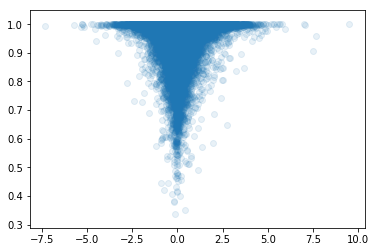

In [4]:
fig = plt.figure()
mask = top_k_div_norm_shi2 > 0
plt.scatter(loss_shi2[mask] - loss_mhi2[mask], collapse_diff_mhi2[mask], alpha = 0.1)

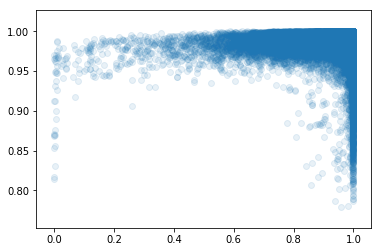

In [15]:
plt.scatter(collapse_diff_mpi2, collapse_diff_inv_mpi2, alpha = 0.1)

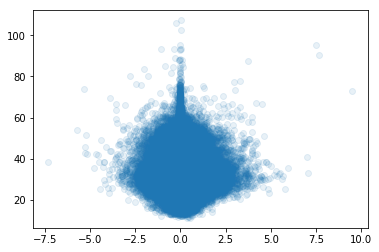

In [26]:
plt.scatter(loss_shi2 - loss_mhi2, facet_norm_shi2, alpha = 0.1)

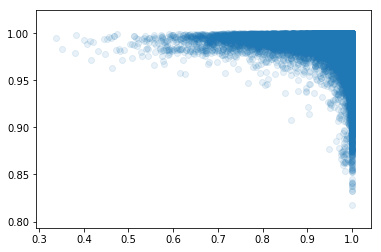

In [9]:
plt.scatter(collapse_diff_mhi2, collapse_diff_inv_mhi2, alpha = 0.1)

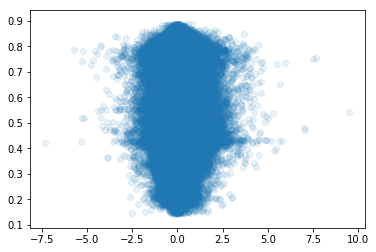

In [106]:
fig = plt.figure()
mask = top_k_div_norm_shi2 > 0
plt.scatter(loss_shi2[mask] - loss_mhi2[mask], eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], alpha = 0.1)


In [ ]:
fig = plt.figure()
mask = top_k_div_norm_shi2 > 0
plt.scatter(loss_shi2[mask] - loss_mhi2[mask], collapse_diff_mhi2[mask], alpha = 0.1)

<BarContainer object of 30 artists>

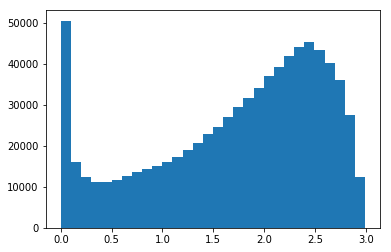

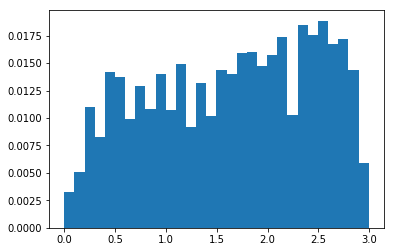

In [27]:
mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(top_entropy_shi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(top_entropy_shi2[mask], bins = 30)
hist_2,edge = np.histogram(top_entropy_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.1)

<BarContainer object of 30 artists>

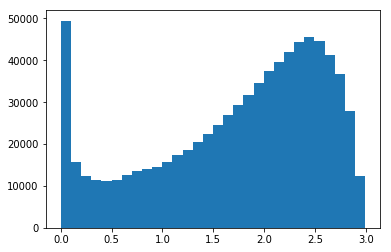

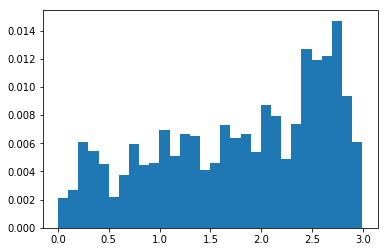

In [38]:
mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(top_entropy_soi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(top_entropy_soi2[mask], bins = 30)
hist_2,edge = np.histogram(top_entropy_soi2[mask], bins = 30, weights=(loss_soi2[mask] - loss_shi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.1)

<BarContainer object of 30 artists>

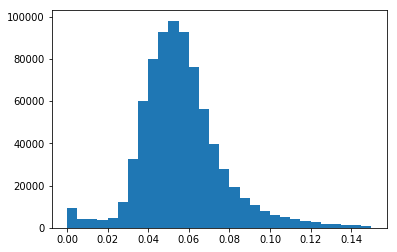

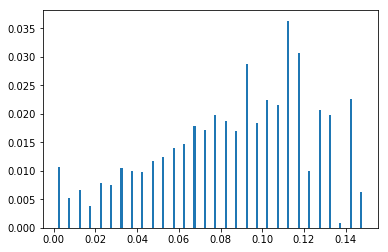

In [40]:
mask = pred_div_sq_weight_mhi2 < 0.15
fig = plt.figure()
plt.hist(pred_div_sq_weight_mhi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(pred_div_sq_weight_mhi2[mask], bins = 30)
hist_2,edge = np.histogram(pred_div_sq_weight_mhi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.001)

<BarContainer object of 30 artists>

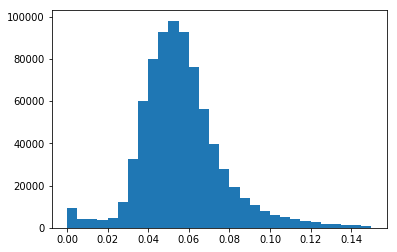

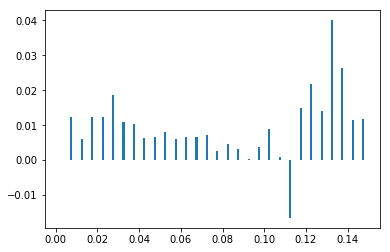

In [41]:
mask = pred_div_sq_weight_mhi2 < 0.15
fig = plt.figure()
plt.hist(pred_div_sq_weight_mhi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(pred_div_sq_weight_mhi2[mask], bins = 30)
hist_2,edge = np.histogram(pred_div_sq_weight_mhi2[mask], bins = 30, weights=(loss_soi2[mask] - loss_shi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.001)

<BarContainer object of 30 artists>

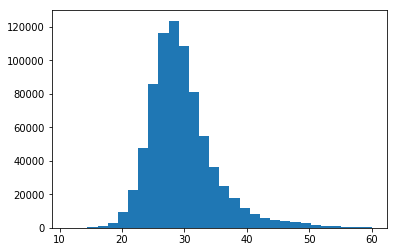

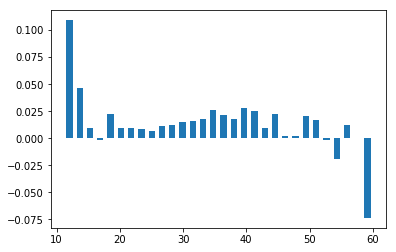

In [30]:
mask = facet_norm_shi2 < 60
fig = plt.figure()
plt.hist(facet_norm_shi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(facet_norm_shi2[mask], bins = 30)
hist_2,edge = np.histogram(facet_norm_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 1)

/home/hschang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


<BarContainer object of 30 artists>

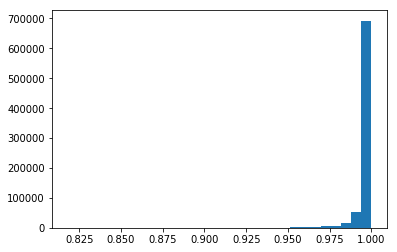

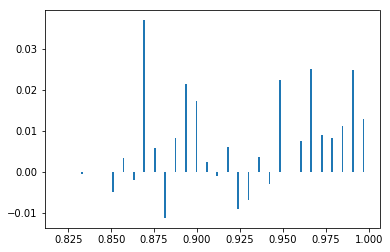

In [32]:
mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(collapse_diff_inv_mhi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(collapse_diff_inv_mhi2[mask], bins = 30)
hist_2,edge = np.histogram(collapse_diff_inv_mhi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.001)

/home/hschang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


<BarContainer object of 30 artists>

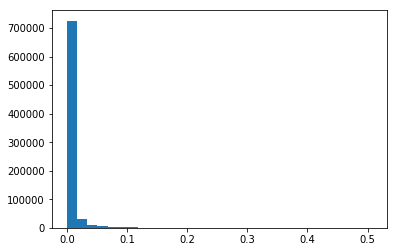

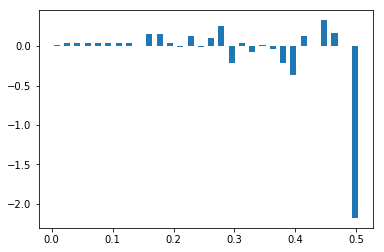

In [34]:
mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(collapse_diff_val_mhi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(collapse_diff_val_mhi2[mask], bins = 30)
hist_2,edge = np.histogram(collapse_diff_val_mhi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

<BarContainer object of 30 artists>

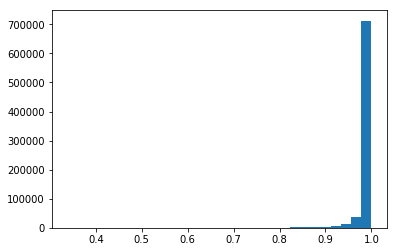

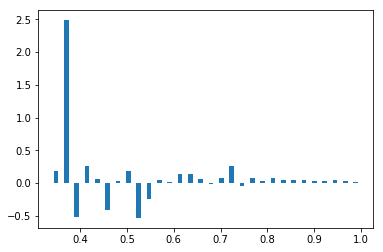

In [19]:
mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(collapse_diff_mhi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(collapse_diff_mhi2[mask], bins = 30)
hist_2,edge = np.histogram(collapse_diff_mhi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

In [ ]:
mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(collapse_diff_mhi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(collapse_diff_mhi2[mask], bins = 30)
hist_2,edge = np.histogram(collapse_diff_mhi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

<BarContainer object of 30 artists>

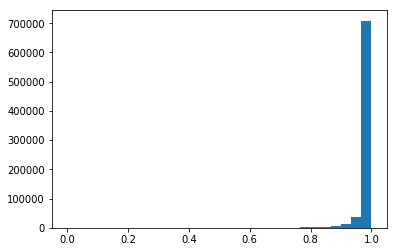

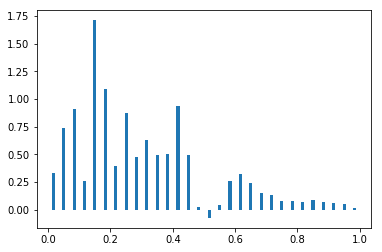

In [20]:
mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(collapse_diff_mpi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(collapse_diff_mpi2[mask], bins = 30)
hist_2,edge = np.histogram(collapse_diff_mpi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mpi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

<BarContainer object of 30 artists>

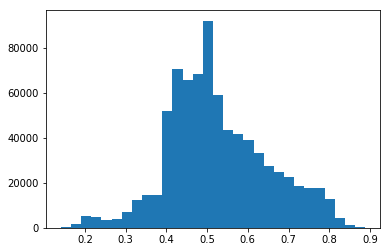

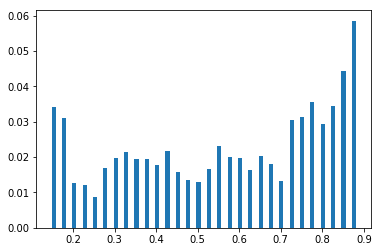

In [107]:
#fig = plt.figure()
#plt.hist(reconstruction_err_shi2, bins = 30)
fig = plt.figure()
plt.hist(eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30)

fig = plt.figure()
#mask = loss_sc - loss_mc > 0
mask = loss_shi2 > 0
#hist_1,edge = np.histogram(reconstruction_err_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30)
#hist_2,edge = np.histogram(reconstruction_err_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
#hist_1,edge = np.histogram(eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30)
#hist_2,edge = np.histogram(eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
hist_1,edge = np.histogram(eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30)
hist_2,edge = np.histogram(eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mpi2[mask]))

#hist_1,edge = np.histogram(eig_vals_min_norm_shi2[mask], bins = 30)
#hist_2,edge = np.histogram(eig_vals_min_norm_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))

middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

In [25]:
mask1 = top_k_div_norm_shi2 > 0
#mask2 = collapse_diff_myi2 < 0.85
#mask2 = collapse_diff_mhi2 < 0.85
mask2 = collapse_diff_mpi2 < 0.95

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

#print(np.mean(loss_shi2[mask1] - loss_mhi2[mask1]))
#print(np.mean(loss_shi2[mask1&mask2] - loss_mhi2[mask1&mask2]))
#print(np.mean(loss_shi2[mask1] - loss_mpi2[mask1]))
#print(np.mean(loss_shi2[mask1&mask2] - loss_mpi2[mask1&mask2]))
#print(np.mean(loss_soi2[mask1] - loss_shi2[mask1]))
#print(np.mean(loss_soi2[mask1&mask2] - loss_shi2[mask1&mask2]))
#print(np.mean(loss_myi2[mask1] - loss_mhi2[mask1]))
#print(np.mean(loss_myi2[mask1&mask2] - loss_mhi2[mask1&mask2]))
#print(np.mean(loss_soi2[mask1] - loss_myi2[mask1]))
#print(np.mean(loss_soi2[mask1&mask2] - loss_myi2[mask1&mask2]))
print(np.mean(loss_mhi2[mask1&(~mask2)] - loss_mpi2[mask1&(~mask2)]))
print(np.mean(loss_mhi2[mask1&mask2] - loss_mpi2[mask1&mask2]))

0.059548717948717945
0.003544634203787529
0.029722428775729268


In [21]:
mask2 = collapse_diff_myi2 < 0.95
print(np.mean(loss_soi2[mask1&(~mask2)] - loss_myi2[mask1&(~mask2)]))
print(np.mean(loss_soi2[mask1&mask2] - loss_myi2[mask1&mask2]))

0.010501833301113575
0.028422587280094093


In [22]:
mask2 = collapse_diff_mhi2 < 0.95
print(np.sum(mask1&mask2) / np.sum(mask1))
print(np.mean(loss_shi2[mask1&(~mask2)] - loss_mhi2[mask1&(~mask2)]))
print(np.mean(loss_shi2[mask1&mask2] - loss_mhi2[mask1&mask2]))

0.03363846153846154
0.012689205310089753
0.04251720637974701


In [23]:
mask2 = collapse_diff_mhi2 < 0.95
print(np.sum(mask1&mask2) / np.sum(mask1))
print(np.mean(loss_myi2[mask1&(~mask2)] - loss_mhi2[mask1&(~mask2)]))
print(np.mean(loss_myi2[mask1&mask2] - loss_mhi2[mask1&mask2]))

0.03363846153846154
0.009459633329282065
0.021953032274278084


In [24]:
mask2 = collapse_diff_mpi2 < 0.95
print(np.mean(loss_soi2[mask1&(~mask2)] - loss_shi2[mask1&(~mask2)]))
print(np.mean(loss_soi2[mask1&mask2] - loss_shi2[mask1&mask2]))

0.0070103436899653605
0.01249450229318018


In [112]:
mask1 = top_k_div_norm_shi2 > 0
mask2 = eig_vals_min_norm_shi2/top_k_div_norm_shi2 < 0.19

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

print(np.mean(loss_shi2[mask1] - loss_mpi2[mask1]))
print(np.mean(loss_shi2[mask1&mask2] - loss_mpi2[mask1&mask2]))

0.002203846153846154
0.018796061686112173
0.028627184441653387


In [72]:
mask1 = top_k_div_norm_shi2 > 0
mask2 = top_k_div_norm_shi2 > 0.8
#mask2 = top_k_div_norm_soi2 > 0.8
#mask2 = top_k_div_norm_myi2 > 0.8
#mask2 = top_k_div_norm_mhi2 > 0.8

#mask2 = collapse_diff_myi2 < 0.85
#mask2 = collapse_diff_mhi2 < 0.85
#mask2 = collapse_diff_mpi2 < 0.85

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

#print(np.mean(loss_mhi2[mask1] - loss_mpi2[mask1]))
#print(np.mean(loss_mhi2[mask1&mask2] - loss_mpi2[mask1&mask2]))

print(np.mean(loss_shi2[mask1] - loss_mpi2[mask1]))
print(np.mean(loss_shi2[mask1&mask2] - loss_mpi2[mask1&mask2]))

#print(np.mean(loss_shi2[mask1] - loss_mhi2[mask1]))
#print(np.mean(loss_shi2[mask1&mask2] - loss_mhi2[mask1&mask2]))

#print(np.mean(loss_soi2[mask1] - loss_myi2[mask1]))
#print(np.mean(loss_soi2[mask1&mask2] - loss_myi2[mask1&mask2]))

#print(np.mean(loss_soi2[mask1] - loss_shi2[mask1]))
#print(np.mean(loss_soi2[mask1&mask2] - loss_shi2[mask1&mask2]))

#print(np.mean(loss_myi2[mask1] - loss_mhi2[mask1]))
#print(np.mean(loss_myi2[mask1&mask2] - loss_mhi2[mask1&mask2]))




0.25245128205128203
0.018796061686112173
0.03181878802959221


(array([4.9000e+01, 8.0000e+01, 9.1000e+01, 1.0100e+02, 1.2800e+02,
        1.5900e+02, 1.6100e+02, 1.9300e+02, 2.7700e+02, 3.9500e+02,
        5.2800e+02, 6.2000e+02, 6.4100e+02, 6.3000e+02, 9.0300e+02,
        8.5200e+02, 7.0200e+02, 6.8100e+02, 9.8600e+02, 8.6800e+02,
        8.3700e+02, 9.9000e+02, 1.5450e+03, 1.9150e+03, 2.4400e+03,
        3.3630e+03, 4.9950e+03, 7.5660e+03, 1.1471e+04, 1.4862e+04,
        1.8207e+04, 2.0328e+04, 2.4432e+04, 2.6288e+04, 2.6296e+04,
        2.8089e+04, 3.1689e+04, 3.5958e+04, 4.3012e+04, 4.7459e+04,
        5.0327e+04, 5.5185e+04, 6.1585e+04, 6.5843e+04, 6.4524e+04,
        5.3483e+04, 3.7002e+04, 2.3658e+04, 7.2460e+03, 3.6000e+02]),
 array([0.43506002, 0.44340265, 0.45174527, 0.46008789, 0.46843051,
        0.47677313, 0.48511575, 0.49345837, 0.50180099, 0.51014362,
        0.51848624, 0.52682886, 0.53517148, 0.5435141 , 0.55185672,
        0.56019934, 0.56854197, 0.57688459, 0.58522721, 0.59356983,
        0.60191245, 0.61025507, 0.61859769, 0.

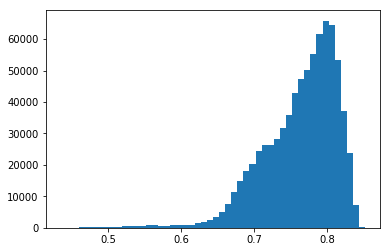

In [73]:
fig = plt.figure()
plt.hist(top_k_div_norm_myi2, bins = 50)

(0.65, 0.845)

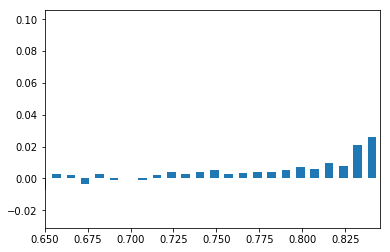

In [92]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_mhi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_mhi2, bins = 50, weights=(loss_mhi2 - loss_mpi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)

(0.65, 0.845)

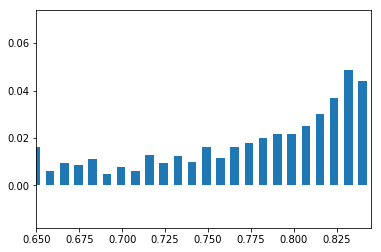

In [93]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_shi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_shi2, bins = 50, weights=(loss_shi2 - loss_mpi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)

(0.65, 0.845)

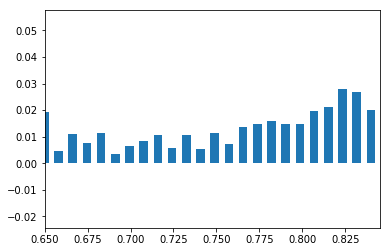

In [94]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_shi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_shi2, bins = 50, weights=(loss_shi2 - loss_mhi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)

(0.65, 0.845)

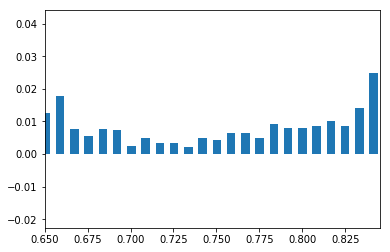

In [95]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_soi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_soi2, bins = 50, weights=(loss_soi2 - loss_shi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)

(0.65, 0.845)

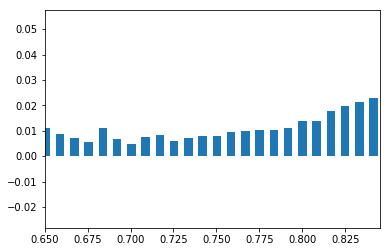

In [96]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_soi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_soi2, bins = 50, weights=(loss_soi2 - loss_myi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)

(0.65, 0.845)

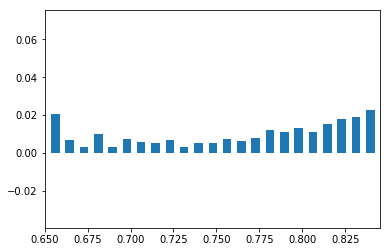

In [97]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_myi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_myi2, bins = 50, weights=(loss_myi2 - loss_mhi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)